Reference: https://pysource.com/2018/05/17/background-subtraction-opencv-3-4-with-python-3-tutorial-32/

In [1]:
from IPython.display import HTML
HTML('''<h2>Background Subtraction</h2><br>
<iframe width="828" 
height="466" 
src="https://www.youtube.com/embed/nRt2LPRz704" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>
''') #Embed the tutorial video

In [2]:
import cv2 #Import cv2 library to video and image processing
import matplotlib.pyplot as plt #Import matplotlib for visualization of sample frames
from google.colab import files #To download the outputs

In [3]:
VIDEO_name = "video.avi" #Define this variable to put the video which will be downloaded

adress = 'https://ndownloader.figshare.com/files/16407260';#Took the adress of the video
!rm "{VIDEO_name}";#To delete the video if it is already exists
!wget -q -O "{VIDEO_name}" "{adress}";#To download video and put it in VIDEO_name 

rm: cannot remove 'video.avi': No such file or directory


In [4]:
OUTPUT_name = 'output.avi' #Name for the output file

example_outputs = list() #Define a fist for outputs
cap = cv2.VideoCapture("video.avi") #To capture the video and put it in a variable

WIDTH = int(cap.get(3)) #Get the width of the data video
HEIGHT = int(cap.get(4)) #Get the height of the data video

out = cv2.VideoWriter(filename=OUTPUT_name,
                      fourcc=cv2.VideoWriter_fourcc('M','J','P','G'), 
                      fps=10, 
                      frameSize=(WIDTH, HEIGHT)) #Video writer for output


subtractor = cv2.createBackgroundSubtractorMOG2(history=10, 
                                                varThreshold=5, 
                                                detectShadows=False) #Background Subtractor MOG2

counter = 0 #Counter for adding a sample frame to example_outputs list at each 100 step
while True:
    success,frame = cap.read()#Read the next frame
    if success == False: break #Break the loop when the frames are consumed

    frame = cv2.blur(frame,(3,3)) #Blur process to prevent parasites
    mask = subtractor.apply(frame) #Creating a mask for detecting the background by using the subtractor

    out.write(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)) #Write the output to the output video
    
    counter += 1
    if (counter+50) % 100 == 0: #Take the frames multiples of 100 (plus 50 to take 50th 150th 250th.. and so on)
        example_outputs.append(mask) #Add the samples to example_outputs
    

cap.release() #Close reading the video
out.release() #Close writing the output

In [5]:
if input("Download outputs(y/n):") == 'y': #Download option for output file
    files.download(OUTPUT_name) #Download the output
else:
    print("The output is not be downloaded...")

Download outputs(y/n):n
The output is not be downloaded...


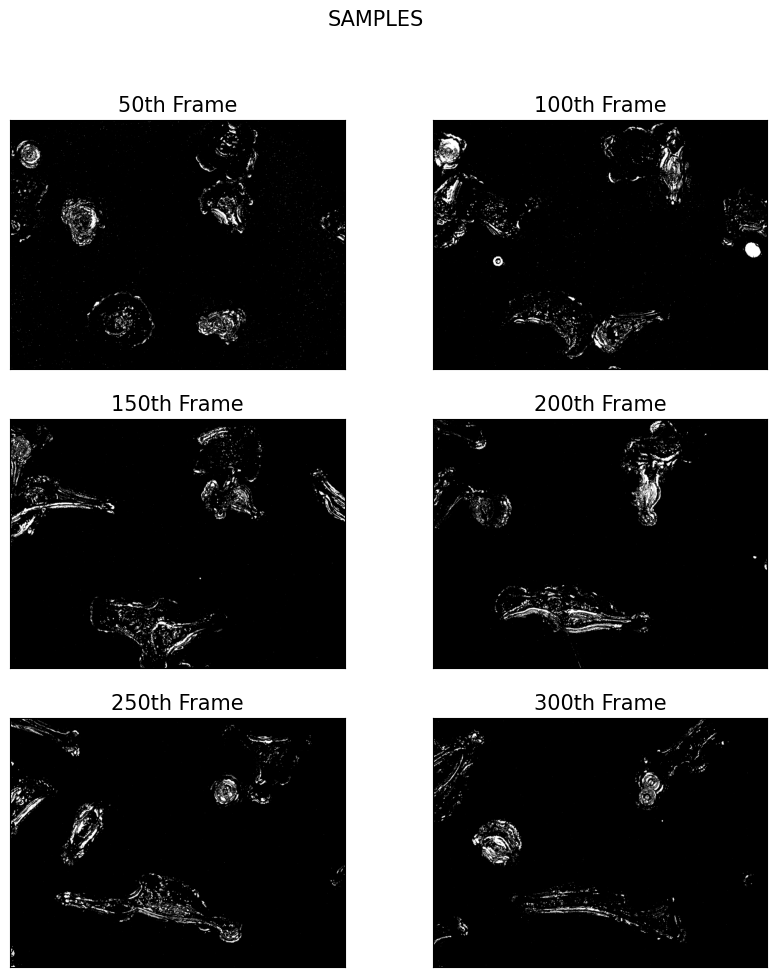

In [6]:
fig, axs = plt.subplots(3,2,figsize=(10,11)) #Create a canvas
fig.suptitle("SAMPLES",fontsize=15) #Crate a title
c = 0 #counter for next image/sample
for i in range(3):
    for j in range(2):
        axs[i,j].imshow(cv2.cvtColor(example_outputs[c],cv2.COLOR_BGR2RGB));#Show the choosen output's frame
        c += 1 
        axs[i,j].set_title(str(c*50)+"th Frame",fontsize=15) #Title of chosen frame
        plt.setp(axs[i,j].get_xticklabels(), visible=False) #To delete the labels of x axis 
        plt.setp(axs[i,j].get_yticklabels(), visible=False) #To delete the labels of y axis 
        axs[i,j].tick_params(axis='both', which='both', length=0) #To delete the ticks of both axis
plt.savefig('sampleoutputs.png', dpi=600) #Save the created collage